# The Patents API: Features Overview

This tutorial provides an overview of the [Patents data source](https://docs.dimensions.ai/dsl/datasource-patents.html) available via the [Dimensions Analytics API](https://docs.dimensions.ai/dsl/). 

The topics covered in this notebook are:

* How to retrieve patents metadata using the [search fields](https://docs.dimensions.ai/dsl/datasource-patents.html) available
* How to use the [schema API](https://docs.dimensions.ai/dsl/data-sources.html#metadata-api) to obtain some statistics about the Patents data available (note: the charts generated in this section are also available online: [patents fields overview ](http://api-sample-data.dimensions.ai/dataviz-exports/1-introducing-patents/patents-fields-overview.html) | [yearly distribution of patents fields](http://api-sample-data.dimensions.ai/dataviz-exports/1-introducing-patents/patents-fields-by-year-count.html) ).

In [1]:
import datetime
print("==\nCHANGELOG\nThis notebook was last run on %s\n==" % datetime.date.today().strftime('%b %d, %Y'))

==
CHANGELOG
This notebook was last run on Jan 25, 2022
==


## Prerequisites

This notebook assumes you have installed the [Dimcli](https://pypi.org/project/dimcli/) library and are familiar with the ['Getting Started' tutorial](https://api-lab.dimensions.ai/cookbooks/1-getting-started/1-Using-the-Dimcli-library-to-query-the-API.html).

In [2]:
!pip install dimcli plotly tqdm -U --quiet 

import dimcli
from dimcli.utils import *

import sys, json, time
from tqdm.notebook import tqdm as progress
import pandas as pd
import plotly.express as px
if not 'google.colab' in sys.modules:
  # make js dependecies local / needed by html exports
  from plotly.offline import init_notebook_mode
  init_notebook_mode(connected=True)
#

print("==\nLogging in..")
# https://digital-science.github.io/dimcli/getting-started.html#authentication
ENDPOINT = "https://app.dimensions.ai"
if 'google.colab' in sys.modules:
  import getpass
  KEY = getpass.getpass(prompt='API Key: ')  
  dimcli.login(key=KEY, endpoint=ENDPOINT)
else:
  KEY = ""
  dimcli.login(key=KEY, endpoint=ENDPOINT)
dsl = dimcli.Dsl()

Searching config file credentials for 'https://app.dimensions.ai' endpoint..


==
Logging in..
Dimcli - Dimensions API Client (v0.9.6)
Connected to: <https://app.dimensions.ai/api/dsl> - DSL v2.0
Method: dsl.ini file


## 1. Sample Patents Queries

For the following queries, we will restrict our search using the keyword `nanotubes`. You can of course change that, so to explore other topics too.

In [3]:
TOPIC = "nanotubes" #@param {type: "string"}

### Searching patents by keyword

We can easily discover patents mentioning the keyword `nanotubes` and sorting them by most recent first. 

In [4]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
    where year is not empty
return patents[basics+jurisdiction+legal_status] 
    sort by publication_date limit 200
""").as_dataframe()

Returned Patents: 200 (total = 89109)
Time: 3.02s


In [5]:
df.head(3)

,assignee_names,assignees,filing_status,id,inventor_names,jurisdiction,legal_status,publication_date,times_cited,title,year,granted_year
0,[한국과학기술연구원],"[{'acronym': 'KIST', 'city_name': 'Seoul', 'co...",Application,KR-102348079-B1,"[구본철, 황준연, 정현수, 유남호]",KR,Granted,2022-01-10,0,Functionalized carbon nanotube and preparing m...,2019,NaN
1,[Tianjin Langmiao New Material Technology Co ltd],NaN,Application,CN-215439686-U,"[ZHANG LIQI, ZHANG WENBIAO, LIU LINGYAN, SONG ...",CN,Active,2022-01-07,0,CVD method preparation carbon nanotube nozzle ...,2021,NaN
2,[Nori Shenzhen New Technology Co ltd],NaN,Application,CN-215428939-U,"[ZHANG XINJIE, SHI JIAGUANG]",CN,Active,2022-01-07,0,Carbon nanotube reactor,2021,NaN


In [6]:
temp = df.copy()
temp['tot'] = 1
px.treemap(
    temp, 
    path=['year', 'jurisdiction' ,'legal_status'], 
    color="legal_status",
    values='tot',
    title=f"Share of different jurisdictions of the 200 most recent patents about '{TOPIC}'"
)

### Searching using fielded search

We can search for Patents by using one or more [field filters](https://docs.dimensions.ai/dsl/datasource-patents.html#patents-fields). 

For example, we can filter by `legal_status`, to get only the 'active' patents.

In [7]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
    where legal_status = "Active"
return patents[basics+jurisdiction+legal_status] 
    sort by publication_date limit 200
""").as_dataframe()
df.head()

Returned Patents: 200 (total = 13932)
Time: 1.05s


,assignee_names,filing_status,id,inventor_names,jurisdiction,legal_status,publication_date,times_cited,title,year,assignees,granted_year
0,[Tianjin Langmiao New Material Technology Co ltd],Application,CN-215439686-U,"[ZHANG LIQI, ZHANG WENBIAO, LIU LINGYAN, SONG ...",CN,Active,2022-01-07,0,CVD method preparation carbon nanotube nozzle ...,2021,NaN,NaN
1,[Nori Shenzhen New Technology Co ltd],Application,CN-215428939-U,"[ZHANG XINJIE, SHI JIAGUANG]",CN,Active,2022-01-07,0,Carbon nanotube reactor,2021,NaN,NaN
2,[Industrial Technology Research Institute ITRI],Application,CN-111805935-B,"[LIU SHIZHOU, YE RIXIANG]",CN,Active,2022-01-07,0,Fiber composite structure,2020,"[{'acronym': 'ITRI', 'city_name': 'Hsinchu', '...",NaN
3,[HANGZHOU CHAOTAN NEW MATERIAL TECHNOLOGY CO LTD],Application,CN-110886089-B,"[WANG XUNGUO, ZHANG YUFENG, Li Sunping, ZHOU Y...",CN,Active,2022-01-07,0,Preparation method of graphene and carbon nano...,2019,NaN,NaN
4,[Shenzhen Yu Gu Technology Co ltd],Application,CN-110871610-B,[LIU YUQUN],CN,Active,2022-01-07,0,Carbon nanotube composite material copper-clad...,2018,NaN,NaN


#### Searching using dates

In [8]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
    where granted_date is not empty
return patents[id+title+expiration_date+granted_date+publication_date+legal_status+jurisdiction] 
    sort by granted_date limit 200
""").as_dataframe()
df.head()

Returned Patents: 200 (total = 9344)
Time: 2.22s


,expiration_date,granted_date,id,jurisdiction,legal_status,publication_date,title
0,2029-08-25,2022-01-06,AU-2021107368-A4,AU,Active,2022-01-06,A Method For Fabricating Nanomaterial Reinforc...
1,2037-03-21,2022-01-05,EP-3438045-B1,EP,Active,2022-01-05,HIGHLY CONDUCTIVE CARBON NANOTUBES
2,2035-06-24,2022-01-05,EP-3160572-B1,EP,Active,2022-01-05,IMPLANTABLE MEDICAL LEAD CONDUCTOR HAVING CARB...
3,2036-02-18,2022-01-04,US-11217753-B2,US,Active,2022-01-04,Formation of carbon nanotube-containing devices
4,2040-07-17,2022-01-04,US-11217727-B2,US,Active,2022-01-04,Light emitting diode


In [9]:
px.scatter(df, 
          x="granted_date", y="expiration_date", 
           hover_name="title",
           color="legal_status")

### Extracting cited publications via `publication_ids`

In [10]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
    where publication_ids is not empty
return patents[basics+publication_ids] 
    sort by publication_date limit 100
""").as_dataframe()
df.head()

Returned Patents: 100 (total = 6646)
Time: 0.98s


,assignee_names,assignees,filing_status,granted_year,id,inventor_names,publication_date,publication_ids,times_cited,title,year
0,[Korea Advanced Institute of Science and Techn...,"[{'acronym': 'KAIST', 'city_name': 'Daejeon', ...",Grant,2021.0,US-10923726-B2,"[CHO WON IL, KIM MUN SEK, LEE SEUNG HUN, KIM M...",2021-02-16,[pub.1056136131],0,Artificial solid electrolyte interphase of a m...,2019
1,[Taiwan Semiconductor Manufacturing Co TSMC Ltd],"[{'acronym': 'TSMC', 'city_name': 'Hsinchu', '...",Grant,2021.0,US-10923659-B2,"[VASEN TIMOTHY, DOORNBOS GERBEN, VAN DAL MARCU...",2021-02-16,"[pub.1056219040, pub.1019759225, pub.105621657...",0,Wafers for use in aligning nanotubes and metho...,2019
2,"[Tsinghua University, Hon Hai Precision Indust...","[{'city_name': 'Banqiao District', 'country_na...",Grant,2021.0,US-10921192-B2,"[WEI YANG, WANG GUANG, FAN SHOU-SHAN]",2021-02-16,"[pub.1002427380, pub.1055851969]",0,Plane source blackbody,2018
3,[University of Louisville Research Foundation ...,"[{'city_name': 'Louisville', 'country_name': '...",Grant,2021.0,US-10919759-B2,[PANCHAPAKESAN BALAJI],2021-02-16,"[pub.1035104001, pub.1018501515, pub.101094220...",0,Method and device for detecting cellular targe...,2019
4,[Industry University Cooperation Foundation IU...,"[{'city_name': 'Seoul', 'country_name': 'South...",Grant,2021.0,US-10916384-B2,"[KIM SEON JEONG, CHOI CHANG SOON, KIM KANG MIN]",2021-02-09,"[pub.1025194958, pub.1023612118]",0,Fibrous electrode and supercapacitor using same,2018


In [11]:
pubs = df.explode('publication_ids').drop_duplicates(subset='publication_ids')['publication_ids'].to_list()
print(len(pubs), "publications found")

453 publications found


Let's get the pubs metadata for some of them:

In [12]:
df = dsl.query(f"""
search publications
    where id in {json.dumps(pubs[:200])}
return publications[id+doi+title+year] 
    limit 1000
""").as_dataframe()
df.head()

Returned Publications: 200 (total = 200)
Time: 0.81s


,doi,id,title,year
0,10.1038/nnano.2017.115,pub.1090339287,High-speed logic integrated circuits with solu...,2017
1,10.1039/c7ta06504c,pub.1091494031,A high-efficiency N/P co-doped graphene/CNT@po...,2017
2,10.1002/smll.201603217,pub.1029400459,Direct‐Writing Multifunctional Perovskite Sing...,2016
3,10.1016/j.carbon.2016.06.008,pub.1025042115,Carbon nanotube-copper composites by electrode...,2016
4,10.1002/adma.201601603,pub.1034694239,3D Arrays of 1024‐Pixel Image Sensors based on...,2016


### Extracting cited patents via `reference_ids`

In [13]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
    where publication_ids is not empty
return patents[basics+reference_ids] 
    sort by publication_date limit 100
""").as_dataframe()
df.head()

Returned Patents: 100 (total = 6646)
Time: 0.69s


,assignee_names,assignees,filing_status,granted_year,id,inventor_names,publication_date,reference_ids,times_cited,title,year
0,[Korea Advanced Institute of Science and Techn...,"[{'acronym': 'KAIST', 'city_name': 'Daejeon', ...",Grant,2021.0,US-10923726-B2,"[CHO WON IL, KIM MUN SEK, LEE SEUNG HUN, KIM M...",2021-02-16,"[US-20180269453-A1, KR-101432915-B1, KR-201301...",0,Artificial solid electrolyte interphase of a m...,2019
1,[Taiwan Semiconductor Manufacturing Co TSMC Ltd],"[{'acronym': 'TSMC', 'city_name': 'Hsinchu', '...",Grant,2021.0,US-10923659-B2,"[VASEN TIMOTHY, DOORNBOS GERBEN, VAN DAL MARCU...",2021-02-16,"[US-9853101-B2, US-9502265-B1, US-9236267-B2, ...",0,Wafers for use in aligning nanotubes and metho...,2019
2,"[Tsinghua University, Hon Hai Precision Indust...","[{'city_name': 'Banqiao District', 'country_na...",Grant,2021.0,US-10921192-B2,"[WEI YANG, WANG GUANG, FAN SHOU-SHAN]",2021-02-16,"[US-20120104213-A1, CN-105675143-A, WO-2016081...",0,Plane source blackbody,2018
3,[University of Louisville Research Foundation ...,"[{'city_name': 'Louisville', 'country_name': '...",Grant,2021.0,US-10919759-B2,[PANCHAPAKESAN BALAJI],2021-02-16,"[US-20080160539-A1, US-9068923-B2, US-9926194-...",0,Method and device for detecting cellular targe...,2019
4,[Industry University Cooperation Foundation IU...,"[{'city_name': 'Seoul', 'country_name': 'South...",Grant,2021.0,US-10916384-B2,"[KIM SEON JEONG, CHOI CHANG SOON, KIM KANG MIN]",2021-02-09,"[US-10483050-B1, KR-20110107196-A, US-20190006...",0,Fibrous electrode and supercapacitor using same,2018


In [14]:
cited_patents = df.explode('reference_ids').drop_duplicates(subset='reference_ids')['reference_ids'].to_list()
print(len(cited_patents), "cited patents found")

2297 cited patents found


### Aggregating results using facets

Patents results can be grouped using facets. E.g. we can see what are the top `assignees`, `researchers` or  `category_for` related to our patents (note: the column 'count' represents the number of patent records in each of the groups).

#### Top assignees

In [15]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
return assignees limit 100
""").as_dataframe()
df.head()

Returned Assignees: 100
Time: 0.65s


,city_name,count,country_name,id,latitude,linkout,longitude,name,types,acronym,state_name
0,Banqiao District,3865,Taiwan,grid.471047.1,25.289920,[http://www.foxconn.com/],121.54920,Foxconn (Taiwan),[Company],NaN,NaN
1,Beijing,3658,China,grid.12527.33,39.999584,[http://www.tsinghua.edu.cn/publish/newthuen/],116.32542,Tsinghua University,[Education],THU,Beijing
2,Seoul,1835,South Korea,grid.419666.a,37.496610,[http://www.samsung.com/sec/home/],127.02690,Samsung (South Korea),[Company],NaN,NaN
3,Seoul,1142,South Korea,grid.464630.3,37.566086,[http://www.lge.co.kr/lgekor/main.do],126.99658,LG Corporation (South Korea),[Company],NaN,NaN
4,Armonk,1057,United States,grid.410484.d,41.108540,[http://www.ibm.com/],-73.72047,IBM (United States),[Company],NaN,New York


In [16]:
px.bar(df, x="name", y="count", color="country_name")

#### Top researchers

In [17]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
return researchers limit 100
""").as_dataframe()
df.head()

Returned Researchers: 100
Time: 1.04s


,count,first_name,id,last_name,research_orgs,orcid_id
0,2206,Shou-Shan,ur.01013717360.95,Fan,"[grid.12527.33, grid.495569.2, grid.21941.3f, ...",NaN
1,1586,Kai-Li,ur.01327532251.18,Jiang,"[grid.495569.2, grid.11135.37, grid.12527.33]",[0000-0002-1547-5848]
2,704,Liang,ur.014403131563.31,Liu,"[grid.12527.33, grid.495569.2]",NaN
3,494,Yang,ur.015435061713.37,Wei,"[grid.495569.2, grid.11135.37, grid.12527.33]",NaN
4,326,Qun-Qing,ur.01336230527.99,Li,"[grid.495569.2, grid.41156.37, grid.12527.33, ...",[0000-0001-9565-0855]


#### Top FOR categories

In [18]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
return category_for limit 100
""").as_dataframe()
df.head()

Returned Category_for: 100
Time: 1.21s


,count,id,name
0,58598,2209,09 Engineering
1,49027,2921,0912 Materials Engineering
2,48471,2210,10 Technology
3,48266,3021,1007 Nanotechnology
4,21989,2203,03 Chemical Sciences


In [19]:
px.pie(df[:20], names="name", values="count", hole=0.5,
       title=f"Top FOR categories for patents about '{TOPIC}'")

## 2. A closer look at Patents statistics

The Dimensions Search Language [exposes programmatically metadata](https://docs.dimensions.ai/dsl/data-sources.html#metadata-api), such as supported sources and entities, along with their fields, facets, fieldsets, metrics and search fields. 


In [20]:
%dsldocs patents

,sources,field,type,description,is_filter,is_entity,is_facet
0,patents,abstract,string,Abstract or description of the patent.,False,False,False
1,patents,additional_filters,string,"Additional filters describing the patents, e.g...",True,False,False
2,patents,assignee_cities,cities,"City of the assignees of the patent, expressed...",True,True,True
3,patents,assignee_countries,countries,"Country of the assignees of the patent, expres...",True,True,True
4,patents,assignee_names,string,"Name of assignees of the patent, as they appea...",True,False,False
5,patents,assignee_state_codes,states,"State of the assignee, expressed using GeoName...",True,True,True
6,patents,assignees,organizations,Disambiguated GRID organisations who own or ha...,True,True,True
7,patents,associated_grant_ids,string,Dimensions IDs of the grants associated to the...,True,False,False
8,patents,category_bra,categories,`Broad Research Areas <https://dimensions.fres...,True,True,True
9,patents,category_for,categories,`ANZSRC Fields of Research classification <htt...,True,True,True


The fields list shown above can be extracted via the following DSL query:

In [21]:
data = dsl.query("""describe source patents""")
fields = sorted([x for x in data.fields.keys()])

### Counting records per each field

By using the fields list obtained above, it is possible to draw up some general statistics re. the Patents content type in Dimensions.

In order to do this, we  use the operator `is not empty` to generate automatically queries like this `search patents where {field_name} is not empty return patents limit 1` and then use the `total_count` field in the JSON we get back for our statistics. 

In [22]:
q_template = """search patents where {} is not empty return patents[id] limit 1"""

# seed results with total number of orgs
total = dsl.query("""search patents return patents[id] limit 1""", verbose=False).count_total
stats = [
    {'filter_by': 'no filter (=all records)', 'results' : total}
]

for f in progress(fields):
    q = q_template.format(f)
    res = dsl.query(q, verbose=False)
    time.sleep(0.5)
    stats.append({'filter_by': f, 'results' : res.count_total})


df = pd.DataFrame().from_dict(stats)
df.sort_values("results", inplace=True, ascending=False)
df

  0%|          | 0/49 [00:00<?, ?it/s]

,filter_by,results
0,no filter (=all records),142746267
35,jurisdiction,142746267
22,date_inserted,142746267
23,dimensions_url,142746267
24,expiration_date,142746267
26,filing_status,142746267
31,id,142746267
32,inventor_names,142746267
34,ipcr,142746267
36,legal_status,142746267


### Creating a bar chart


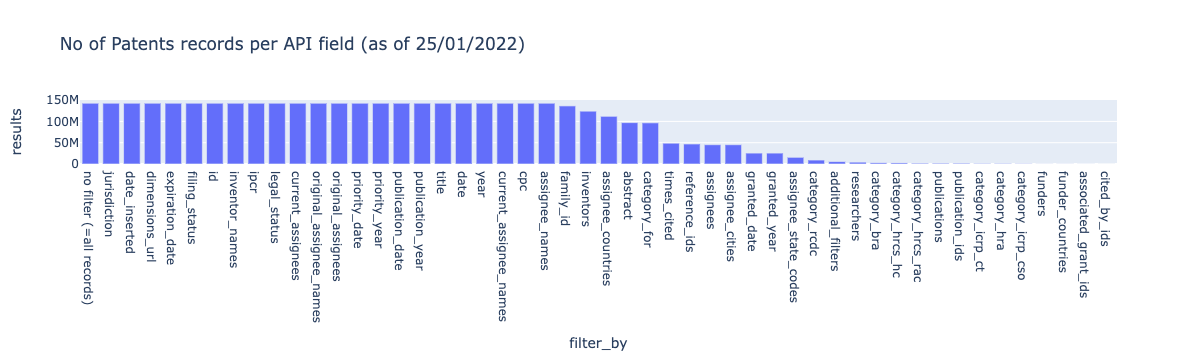

In [23]:
from datetime import date
today = date.today().strftime("%d/%m/%Y")

from plotly.offline import plot
fig = px.bar(df, x=df['filter_by'], y=df['results'],
             title=f"No of Patents records per API field (as of {today})")
plot(fig, filename = 'patents-fields-overview.html', auto_open=False)
fig.show()

### Counting the yearly distribution of field/records data 



In [24]:
#
# get how many records have values for each field, for each year
#

q_template = """search patents where {} is not empty return year limit 150"""

# seed with all records data (no filter)
seed = dsl.query("""search patents return year limit 150""", verbose=False).as_dataframe()
seed['segment'] = "all records"

for f in progress(fields):
    q = q_template.format(f)
    res = dsl.query(q, verbose=False).as_dataframe()
    res['segment'] = f
    seed = seed.append(res, ignore_index=True )
    time.sleep(0.5)

seed = seed.rename(columns={'id' : 'year'})
seed = seed.astype({'year': 'int32'})

#
# fill in (normalize) missing years in order to build a line chart
#

yrange = [seed['year'].min(), seed['year'].max()]
# TIP yrange[1]+1 to make sure max value is included
all_years = [x for x in range(yrange[0], yrange[1]+1)]  

def add_missing_years(field_name):
    global seed
    known_years = list(seed[seed["segment"] == field_name]['year'])
    l = [] 
    for x in all_years:
        if x not in known_years:
            l.append({'segment' : field_name , 'year' : x, 'count': 0 })
    seed = seed.append(l, ignore_index=True )
    
all_field_names = seed['segment'].value_counts().index.tolist()
for field in all_field_names:
    add_missing_years(field)
    

  0%|          | 0/49 [00:00<?, ?it/s]

### Creating a line chart 


A few things to remember: 

* There are a lot of overlapping lines, as many fields appear frequently; hence it's useful to click on the right panel to hide/reveal specific segments.  
* We set a start year to avoid having a long tail of (very few) patents published a long time ago. 

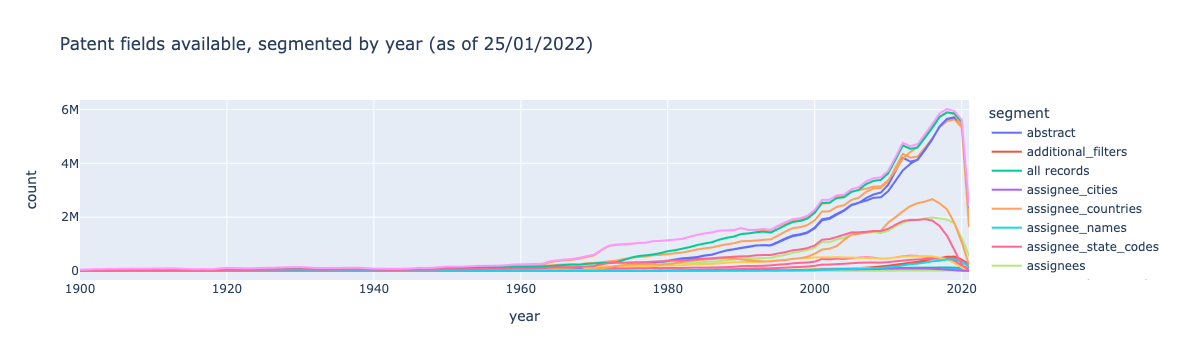

In [25]:
start_year = 1900

# need to sort otherwise the chart is messed up!
temp = seed.query(f"year >= {start_year}").sort_values(["segment", "year"]) 
# 
fig = px.line(temp, x="year", y="count", color="segment",
               title=f"Patent fields available, segmented by year (as of {today})")
plot(fig, filename = 'patents-fields-by-year-count.html', auto_open=False)
fig.show()

## Where to find out more



Please have a look at the [official documentation](https://docs.dimensions.ai/dsl/datasource-patents.html) for more information on Patents.